In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1

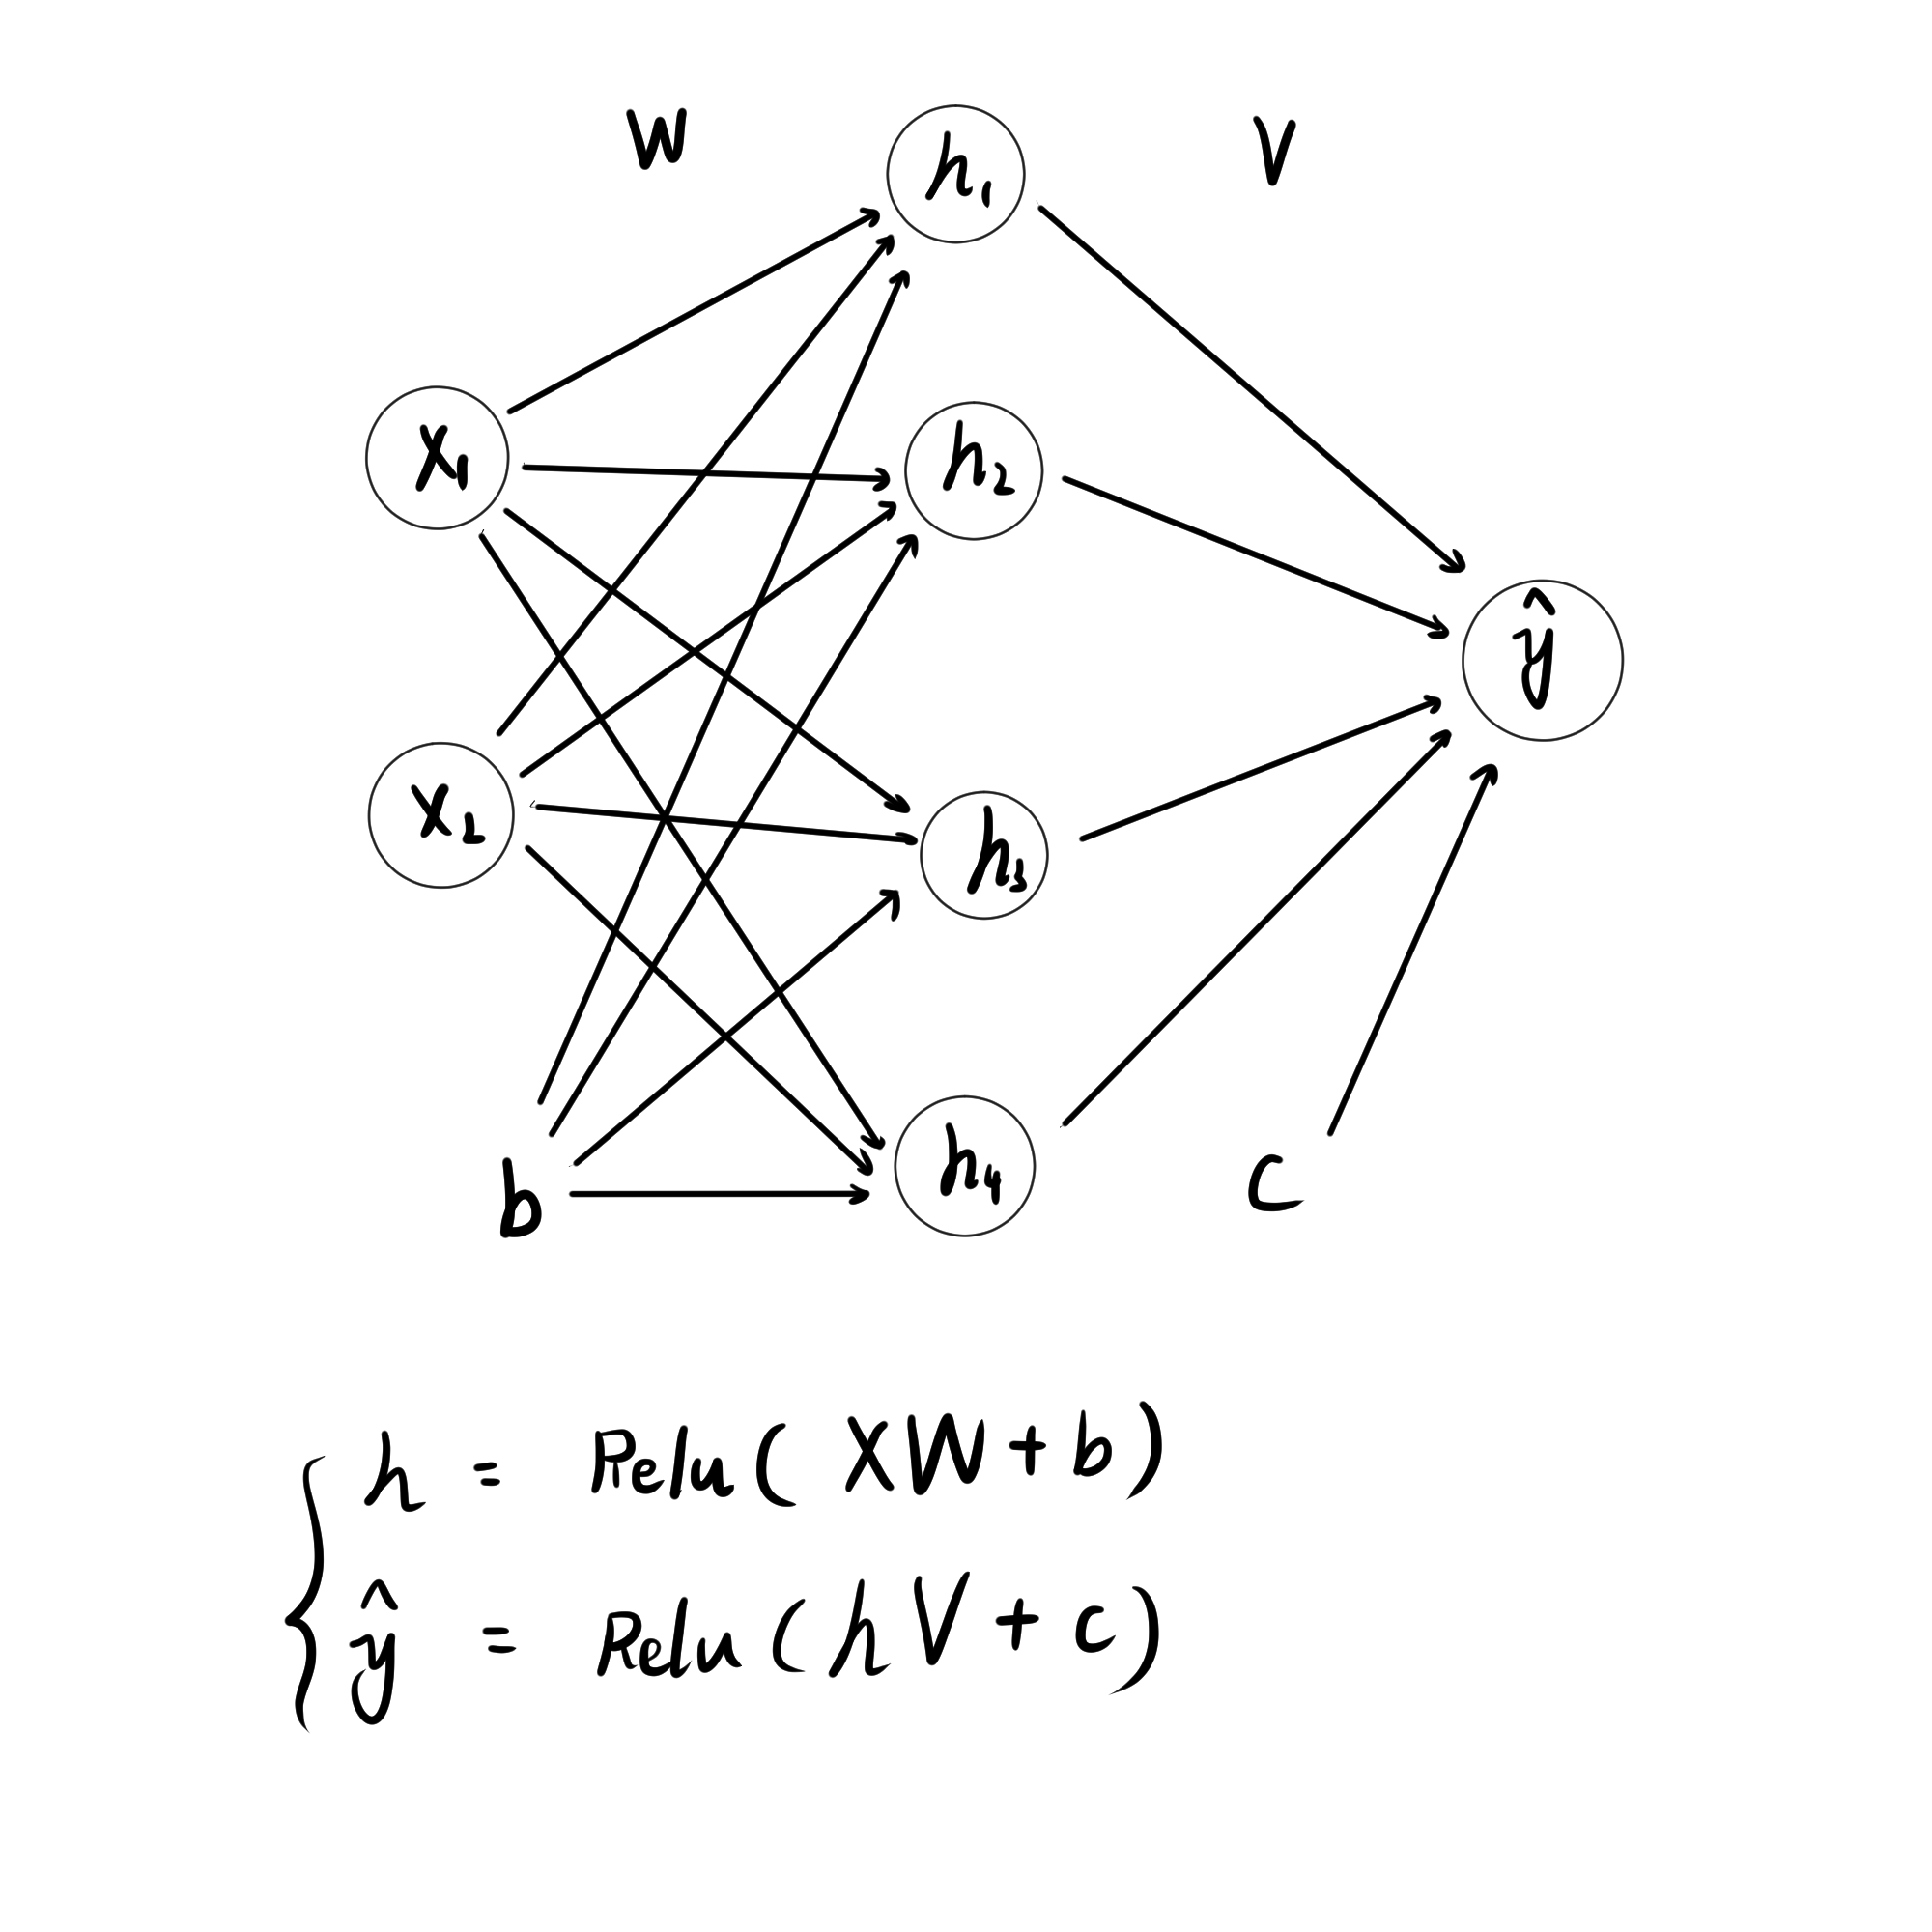

In [8]:
from IPython.display import Image

i = Image(filename='HW2.png')
i

In [30]:
def relu(z):
  return np.where(z>0, z, 0)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def nn_layer(X, W, b, f):
  return f(np.dot(X, W) + b)

In [46]:
def ff_nn__Relu(X, W, b, V, c):
  H = nn_layer(X, W, b, relu)
  Y_hat = nn_layer(H, V, c, sigmoid)
  return Y_hat

In [48]:
X = [
     [1, -1],
     [0, -1],
     [0, 1]
]
W = [
     [1, -1, 0, 1],
     [0, 0, .5, 1]
]
b = [0, 0, 1, 0]
V = [1, 0, -1, 1]
c = [1]
print(ff_nn__Relu(X, W, b, V, c))

[0.81757448 0.62245933 0.62245933]


## 2

$$
f_x(x, y) = -3x^2 + 100x - 200y^2
$$

$$
f_y(x, y) = 800y^3 -400xy
$$

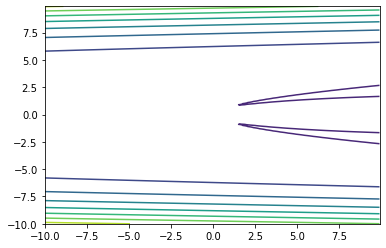

In [18]:
delta = 0.1
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)

X, Y = np.meshgrid(x, y)
Z = (3-X**3)+50*(2*Y**2-X)**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

In [19]:
def grad_f(vector):
    x, y = vector
    df_dx = (2/125)*x 
    df_dy = (2/25)*y
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-10,10,size=2)
    else:
        point=starting_point
    
    traj = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        traj.append(point)
        
    return np.array(traj)

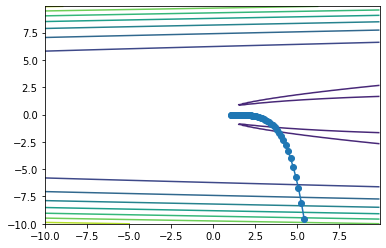

In [20]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x1= traj[:,0]
y1= traj[:,1]
plt.plot(x1,y1,'-o')

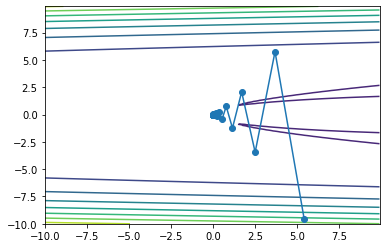

In [22]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=20)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x1= traj[:,0]
y1= traj[:,1]
plt.plot(x1,y1,'-o')

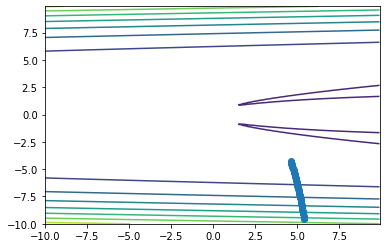

In [23]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=.2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x1= traj[:,0]
y1= traj[:,1]
plt.plot(x1,y1,'-o')

In [24]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-10,10,size=2)
    else:
        point=starting_point
    
    traj = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        traj.append(point)
        
    return np.array(traj)

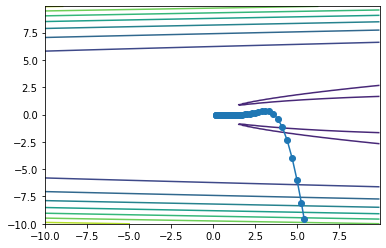

In [25]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x1= traj[:,0]
y1= traj[:,1]
plt.plot(x1,y1,'-o')

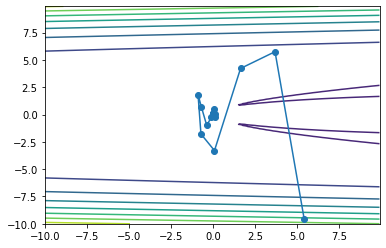

In [29]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=20, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x1= traj[:,0]
y1= traj[:,1]
plt.plot(x1,y1,'-o')

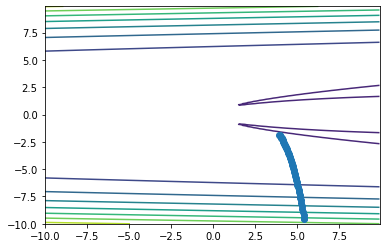

In [28]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=.2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x1= traj[:,0]
y1= traj[:,1]
plt.plot(x1,y1,'-o')

## 3

\begin{aligned}
\frac{\partial L}{\partial c} &= (-\frac{y}{\hat y}+\frac{1-y}{1-\hat y})\cdot{\hat y\ (1-\hat y)}\\
\frac{\partial L}{\partial v_j} &= \frac{\partial L}{\partial c}\cdot{relu(\sum_i{x_i\ w_{ij}}+b_j)}\\
\frac{\partial L}{\partial b_j} &= \frac{\partial L}{\partial c}\cdot{v_j}\cdot{relu_{derivative}(\sum_i{x_i\ w_{ij}}+b_j)}\\
\frac{\partial L}{\partial w_{ij}} &= \frac{\partial L}{\partial b_j}\cdot{x_i}
\end{aligned}

In [36]:
def binary_cross_entropy(y, y_hat):
    return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

def relu_derivative(x):
    return np.where(x>0, 1, 0)

In [52]:
def grad_f(param_vec, X, y):
    
    W = param_vec[:8].reshape((2,4))
    b = param_vec[8:12]
    V = param_vec[12:16]
    c = param_vec[16]

    y_hat = ff_nn__Relu(X, W, b, V, c)
    
    dL_dc = np.sum((-y/y_hat+(1-y)/(1-y_hat))*(y_hat*(1-y_hat)))
    dL_dV = (-y/y_hat+(1-y)/(1-y_hat))*(y_hat*(1-y_hat)) @ relu(X@W+b)
    dL_db = np.sum(np.outer((-y/y_hat+(1-y)/(1-y_hat))*(y_hat*(1-y_hat)), V)*relu_derivative(X@W+b), axis=0)
    dL_dW = X.T @ (np.outer((-y/y_hat+(1-y)/(1-y_hat))*(y_hat*(1-y_hat)), V)*relu_derivative(X@W+b))
    
    return np.concatenate((dL_dW, dL_db, dL_dV, dL_dc), axis=None)/len(y), binary_cross_entropy(y, y_hat)

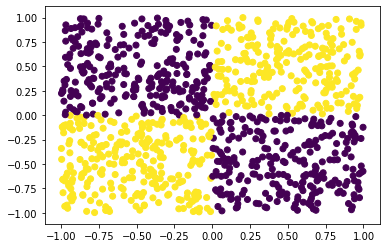

In [53]:
x = np.random.uniform(low=-1,high=1,size=2000).reshape((1000,2))
y = np.zeros(1000)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

In [54]:
def grad_descent(x, y, starting_point=None, iterations=10, learning_rate=1e-2):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=17)
    trajectory = [point]
    W = point[:8].reshape((2,4))
    b = point[8:12]
    V = point[12:16]
    c = point[16]
    losses = [binary_cross_entropy(y, ff_nn__Relu(x, W, b, V, c))]
    
    for i in range(iterations):
        grad, loss = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss)
    return (np.array(trajectory), losses)

Text(0.5, 0, 'Iteration')

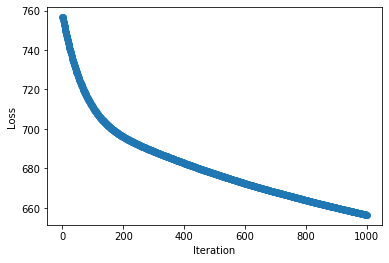

In [61]:
traj, losses = grad_descent(x, y, iterations=1000, learning_rate=1e-2)

plt.plot(losses,'o')
plt.ylabel("Loss")
plt.xlabel("Iteration")

In [65]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10000, alpha=.9, learning_rate=1e-2):
    if starting_point is None:
        point = np.random.uniform(-.1, .1, size=17)
    else:
        point = starting_point
    trajectory = [point]
    W = point[:8].reshape((2,4))
    b = point[8:12]
    V = point[12:16]
    c = point[16]
    losses = [binary_cross_entropy(y, ff_nn__Relu(x, W, b, V, c))]
    v = np.zeros(17)
    
    for i in (range(iterations)):
        grad, loss = grad_f(point, x, y)
        v = alpha * v + learning_rate * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss)
        
    return np.array(trajectory), losses

Text(0.5, 0, 'Iteration')

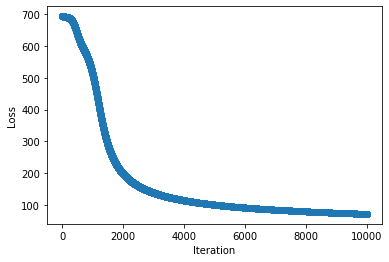

In [66]:
traj, losses = grad_descent_with_momentum(x, y, alpha=.9, learning_rate=1e-2)
plt.plot(losses,'o')
plt.ylabel("Loss")
plt.xlabel("Iteration")

This is more efficient than gradient descent method. 

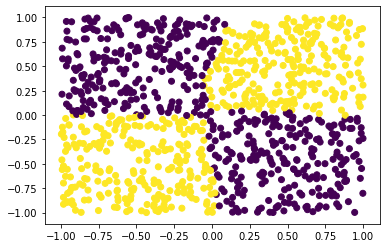

In [68]:
x = np.random.uniform(low=-1,high=1,size=2000).reshape((1000,2))
point = traj[-1]
W = point[:8].reshape((2,4))
b = point[8:12]
V = point[12:16]
c = point[16]
y_hat = ff_nn__Relu(x, W, b, V, c)
colors = (y_hat>0.5)*1
plt.scatter(x[:,0], x[:,1], c=colors)